# Introdução

![](https://i.imgur.com/Stv7spo.jpg)

O Coronavírus, causador da pandemia global, pertence a uma família de vírus (CoV) que já circula no Brasil. Os vírus dessa família podem causar desde resfriados comuns a doenças mais graves, como a Síndrome Aguda Respiratória Severa (SARS) e a Síndrome Respiratória do Oriente Médio (MERS).

O Novo Coronavírus recebeu a denominação SARS-CoV-2 pela Organização Mundial da Saúde (OMS) e a doença que ele provoca tem a denominação COVID-19.

# Descrição do Modelo

Neste notebook será utilizado o algorítimo ARVORE ALEATÓRIA (Random forests _ou_ Random Decision Forests) para realizar um forecast (previsão) do numero de mortes ocorridas no Brasil, em destaque no Estado de São Paulo.

O processo realizado nesse notebook segue o seguinte roteiro:

1. Importação dos dados fornecidos pelo [Ministério da Saúde](https://covid.saude.gov.br/), e a nível municipal, pelo [Brasil.io](https://brasil.io/dataset/covid19/caso/);
2. Análise visual dos dados;
3. Tratamento dos dados e aplicação do algorítimo
4.
5.

# Notebook

### Importação de Bibliotecas

In [21]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from django.core.validators import URLValidator
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px


# Tratamento e Visualização dos dados

### No Brasil


In [22]:
#Ultimos 10 dias  de morte no BRASIL!
original_df = pd.read_csv("cases-brazil-states-18-05-2020.csv");
df_br = original_df.filter(['date', 'state', 'deaths']);
df_br = df_br.loc[df_br['state'] == "TOTAL"];

print("Ultimos 10 dias de mortes no Brasil")
print(df_br.tail(10));
print("\n\nGráfico da curva de crescimento das mortes")

fig = px.bar(df_br, x="date", y="deaths", color="deaths", barmode="group")
fig.show()

Ultimos 10 dias de mortes no Brasil
            date  state  deaths
1637  2020-05-09  TOTAL   10697
1665  2020-05-10  TOTAL   11175
1693  2020-05-11  TOTAL   11659
1721  2020-05-12  TOTAL   12502
1749  2020-05-13  TOTAL   13280
1777  2020-05-14  TOTAL   14069
1805  2020-05-15  TOTAL   14982
1833  2020-05-16  TOTAL   15697
1861  2020-05-17  TOTAL   16199
1889  2020-05-18  TOTAL   16902


Gráfico da curva de crescimento das mortes


In [23]:
df = original_df.loc[original_df['date'] == "2020-05-18"];
df = df.loc[df['state'] != "TOTAL"];
df = df.loc[df['deaths'] > 100];
df = df.filter(['state', 'deaths']);
df = df.sort_values(by=['deaths'],ascending=False)

print("\n\nRelação de mortes por estados com mais de 100 mortes")
fig = px.bar(df, x="state", y="deaths", color="state", barmode="group", width=1000)
fig.show()



Relação de mortes por estados com mais de 100 mortes


O Estado de São Paulo concentra o maior número de óbitos ocorridos no Brasil, seguido pelo Rio de Janeiro, Ceara e Pernambuco.

### Comparação de crescimento entre os estados

In [24]:
#

Por meio destes gráficos podemos vizualisar as curvas de crescimento do numero de mortes de cada estado ao decorrer do tempo.

### No Estado de São Paulo

In [25]:
#Ultimos 10 dias  de morte no Estado DE SÃO PAULO!
df_sp = original_df.filter(['date', 'state', 'deaths']);
df_sp = df_sp.loc[df_sp['state'] == "SP"];

print("Ultimos 10 dias de Mortes no Estado de São Paulo")
print(df_sp.tail(10));

print("\n\nGráfico da curva de crescimento das mortes")

#foundNull = df_sp['deaths'].isnull().values.any(); #Nenhum valor nulo encontrado


fig = px.bar(df_sp, x="date", y="deaths", color="deaths", barmode="group")
fig.show()

Ultimos 10 dias de Mortes no Estado de São Paulo
            date state  deaths
1635  2020-05-09    SP    3608
1663  2020-05-10    SP    3709
1691  2020-05-11    SP    3743
1719  2020-05-12    SP    3949
1747  2020-05-13    SP    4118
1775  2020-05-14    SP    4315
1803  2020-05-15    SP    4501
1831  2020-05-16    SP    4688
1859  2020-05-17    SP    4782
1887  2020-05-18    SP    4823


Gráfico da curva de crescimento das mortes


O gráfico de mortes do Estado de São Paulo apresenta alguns picos de mortes em dias específicos, causando "saltos" no gráfico.

### Declarando classe auxiliadora

In [26]:
from myownapi.AnalyticsRandomForest import AnalyticsRandomForest;
analytics = AnalyticsRandomForest();

#NOTA: Classe ocultada pois estou no meu pc, ela fica em outra pasta!


# Aplicando FLORESTA ALEATÓRIA

O modelo ARVORE DE DECISÃO é aplicado utilizando a classe auxiliadora declarada acima.

## No Brasil

In [27]:
original_df = None; #Deleta isso para lagar menos a IDE

In [28]:
df_br_altered = df_br.filter(['deaths']);
df_br_altered = df_br_altered.reset_index(drop=True)
df_br_altered['date'] = df_br_altered.index.copy();
df_br_altered = df_br_altered.iloc[21:] #Removendo os primerios 21  dias devido a auxencia de mortes

Para prejudica menos o algorítimo de flore elatória, removemos os primeiros 23 dias por nao constatarem nenhuma morte. 

In [29]:
print("Aplicando ARVORE DE DECISÃO para os dados nacionais")
analytics_br = AnalyticsRandomForest();
analytics_br.df = df_br_altered;
analytics_br.definirAtributosDePrecisao(['date'])
analytics_br.definirAtributoDesejado('deaths');
analytics_br.definirPorcentagemDeTeste(20);
analytics_br.aplicarArvoreDeDecisao();

Aplicando ARVORE DE DECISÃO para os dados nacionais
Atributos de precisão definidos para:
-->  date
Total de 1 atributos.
Definindo atributo desejado para: deaths
Porcentagem de Teste definido para: 20%
Porcentagem de Treino definido para: 80%
Iniciando Floresta aleatória!
Modelo treinado com sucesso, ordenando treino e test
Floresta aleatória aplicada com sucesso!


In [30]:
dfCompar = analytics_br.compararPredicao();
dfCompar.tail(15)

,Atual,Predição
71,8597,8488.60
72,9268,9094.83
73,10027,9669.40
74,10697,10098.22
75,11175,11082.70
76,11659,11689.17
77,12502,12535.56
78,13280,13208.43
79,14069,13911.56
80,14982,13985.50


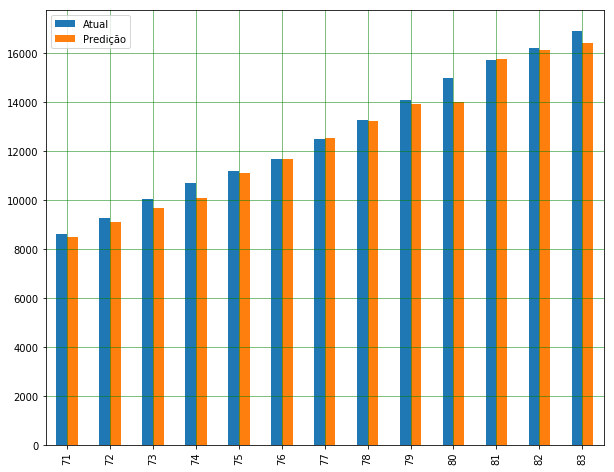

In [31]:
analytics_br.compararPredicaoGraficamente(dfCompar);


In [32]:
lastIndex = df_br_altered.tail(1).index.item() + 1;

In [41]:
x_forecast = [];
for i in range(10):
    x_forecast.append(i + lastIndex);
x_forecast = DataFrame(x_forecast)

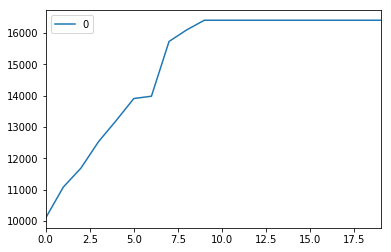

In [42]:
y_result_forecast = analytics_br.RandomForestForecast(x_forecast);

df_forecast = DataFrame(y_result_forecast);
df_forecast.plot()

In [35]:
df_forecast.head(20)

,0
0,16412.25
1,16412.25
2,16412.25
3,16412.25
4,16412.25
5,16412.25
6,16412.25
7,16412.25
8,16412.25
9,16412.25


In [36]:
print ("Erro médio Absoluto: " + str(analytics_br.calcularErroMedioAbsoluto()));
print ("Erro médio Quadratico: " + str(analytics_br.calcularErroMedioQuadratico()));
print ("Raiz Quadradada do Erro Medio Quadratico: " + str(analytics_br.calcularRaizQuadradadaDoErroMedioQuadratico()));


Erro médio Absoluto: 249.4576923076922
Erro médio Quadratico: 139394.81502307698
Raiz Quadradada do Erro Medio Quadratico: 373.3561503753179


A predição acima é esparçada, ele pega pontos aleatórios e vai prevendo entre si, por isso nao da para dar forecast nesses dados, estou tentando resolver isso.




Bom, ta no progresso, forecast com arvore de decisão é meio complicado, ainda estou lendo isso daqui para ver se consgio

https://www.statworx.com/de/blog/time-series-forecasting-with-random-forest/

